## Tasca S5 T01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Exercicis d'Hipotesis Testing.**

In [2]:
#cargar el dataset
UEFA = pd.read_csv("dataset/UEFA.csv", sep = ";", index_col = None, encoding = "ISO-8859-1")

In [3]:
UEFA.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


**Content:**

+90 rows and 20 columns.
Columns' description are listed below.

* **Rk :** Rank
* **Squad :**  Squad's name
* **Country :**  Name of the country
* **LgRk :**  Squad finish within the league
* **MP :**  Matches Played
* **W :**  Won 
* **D :**  Draw
* **L :**  Loss
* **GF :**  Goals For 
* **GA :**  Goals Against
* **GD :**  Goal Difference (i.e., difference between GF and GA, and sometimes denoted by +/-)
* **Pts :** Points (i.e., total number of points earned by a team after playing a certain number of games). A team is awarded 3 points after winning a match or one point if the game ends as a draw or tie.
* **Pts/G :** Points per game
* **xG :** Expected goals
* **xGA :** Expected goals allowed
* **xGD :** Expected goals difference
* **xGD/90 :** Expected goals difference per 90 minutes
* **Attendance :** Attendance per game during this season, only for home matches
* **Top Team Scorer :** Top team scorer in league play
* **Goalkeeper :** Goalkeeper with the most minutes in league play

### Exercici 1

*Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.*

En este primer ejercicio queremos determinar cual es el promedio de puntos que debemos alcanzar para ganar la liga. Seguiremos los pasos básicos para realizar el test de hipótesis. 

En los criterios para la prueba hemos considerado conveniente reducir el tamaño de la muestra a los líderes de cada una de grandes ligas europeas **(LgRk = 1)** para tener una distribución normal y más homogénea. En este caso son 5.

In [5]:
Top_UEFA = UEFA[UEFA['LgRk'] == 1]
Top_UEFA.describe().round(2)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,5.00,5.0,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,3.80,1.0,36.40,25.60,6.8,4.00,84.80,31.80,53.00,83.60,2.29,75.76,36.44,39.30,1.08,42023.00
std,1.92,0.0,1.34,1.52,1.3,0.71,12.76,5.17,13.84,4.67,0.08,11.54,6.85,15.05,0.43,6998.03
min,1.00,1.0,34.00,24.00,5.0,3.00,66.00,24.00,35.00,77.00,2.24,60.00,26.80,25.60,0.69,33176.00
25%,3.00,1.0,37.00,25.00,6.0,4.00,80.00,31.00,49.00,83.00,2.24,71.60,34.40,27.20,0.73,40624.00
50%,4.00,1.0,37.00,25.00,7.0,4.00,85.00,31.00,49.00,83.00,2.26,73.00,37.10,33.40,0.90,41188.00
75%,5.00,1.0,37.00,26.00,8.0,4.00,96.00,36.00,60.00,85.00,2.30,86.10,38.10,51.00,1.50,42388.00
max,6.00,1.0,37.00,28.00,8.0,5.00,97.00,37.00,72.00,90.00,2.43,88.10,45.80,59.30,1.60,52739.00


Especificamos la hipótesis:
* **La hipótesis nula (H<sub>0</sub>)**: la media de la media de todos los equipos H<sub>0</sub>: μ = 83.60
* **Hipótesis alternativa (H<sub>1</sub>**): queremos asegurarnos de cuantos puntos necesitamos para ganar la liga, por lo tanto, la condición que se probará es la media de la población es menor que el objetivo. H<sub>1</sub> < 83.6. 

Realizaremos la prueba de *Shapiro-Wilk* para comprobar si la muestra de datos de datos tiene una distribución gaussiana.

stat=0.954, p=0.769
Probably Gaussian


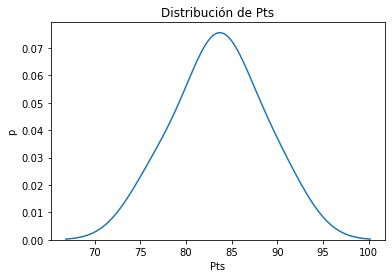

In [6]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = Top_UEFA['Pts'].values
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
#plot it
sns.kdeplot(data)

plt.title("Distribución de Pts")
plt.xlabel("Pts")
plt.ylabel("p")

plt.show()

**Conclusión**: Después de realizar la prueba de hipótesis, obtenemos un valor **p** de **0.769**. El valor p es mayor que el nivel de significancia del 5%.  
Por lo tanto, podemos confirmar la hipótesis nula y concluir que para ganar la liga necesitaremos como mínimo 83 puntos.

### Exercici 2

*Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.*

Para esta segunda prueba, estamos interesados en comprobar si existe una relación entre tener al *"pichichi"* o máximo goleador de la liga en nuestro equipo y ganar el título de liga. Para ello realizaremos un muestreo sobre una de las ligas. En este caso concreto hemos seleccionado la liga alemana **(GER)**, la cual está compueta por un total de 18 equipos y la analizaremos con sus respectivos máximos goleadores de cada equipo. A un nivel de significacición del 5%, ¿podremos decir que un jugador nos puede hacer ganar la liga?.  

Los datos son los siguientes:

In [7]:
# Create dataset
UEFA[['Top Team Scorer','Goals']] = UEFA['Top Team Scorer'].str.rsplit(pat='-', n=1, expand=True) 
UEFA['Goals'] = UEFA['Goals'].astype(int)

GER = UEFA[UEFA['Country'] == 'GER'] # filtramos por 'country'

data1 = GER[['LgRk', 'Top Team Scorer','Goals']] # seleccionamos columnas de interés
data1.sort_values(by = 'Goals', ascending = False).head()

,LgRk,Top Team Scorer,Goals
3,1,Robert Lewandowski,35
12,3,Patrik Schick,24
8,2,Erling Haaland,22
34,7,Anthony Modeste,20
22,4,Christopher Nkunku,20


Para verificar si las dos muestras están relacionadas utilizaremos el *Coeficiente de correlación de Pearson*, donde comprobaremos si las dos muestras tienen una relación lineal.

stat=-0.809, p=0.000
Probably dependent


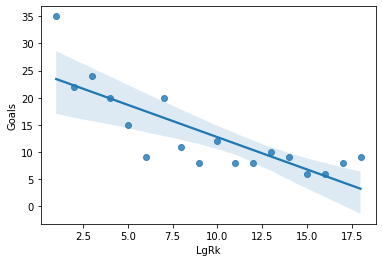

In [9]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data2 = GER['LgRk'] #ESP
data3 = GER['Goals'] #ENG
stat, p = pearsonr(data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    
#plot it
sns.regplot(x=data2, y=data3)
plt.show()

**Conclusión**: A un nivel de significancia del 5 %, a partir de los datos de la muestra, con una **correlación negativa linear de casi -1 (-0.809)** entre *Goals* y la clasificación final del equipo en la liga *(LgRk)*.  
Podemos concluir que tener al máximo goleador de la competición en nuestro equipo influye a la hora de ganar el título de liga. El valor de **p = 0.000** lo ratifica.

### Exercici 3

*Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.*

En la última prueba nos gustaria saber cuán eficaces son los equipos en cada una de las ligas europeas, ¿es realmente mejor una liga que otra?.  

Para ello, el estudio se realizará con la muestra de los 20 equipos que componen cada una de las ligas y seleccionaremos los goles a favor *('GF')*, posteriormente comparararemos los datos de 3 ligas diferentes.

**NOTA**: Descartamos la liga alemana (GER) por tener un numero de muestras inferior a las otras ligas (18).

stat=0.807, p=0.451
Probably the same distribution


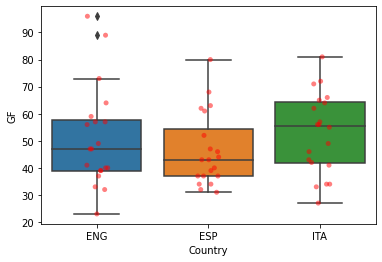

           GF
Country      
ENG      50.9
ESP      46.5
ITA      52.7


In [17]:
# Create a dataset
ESP = UEFA[UEFA['Country'] == 'ESP']
ENG = UEFA[UEFA['Country'] == 'ENG']
FRA = UEFA[UEFA['Country'] == 'FRA']
ITA = UEFA[UEFA['Country'] == 'ITA']

plotdata = UEFA[(UEFA.Country == 'ESP') | (UEFA.Country == 'ENG') | (UEFA.Country == 'ITA') ]

# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data4 = ENG['GF'] #ENG
data5 = ESP['GF'] #ESP
data6 = ITA['GF'] #FRA
stat, p = f_oneway(data4, data5, data6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

# plot it
sns.boxplot(x = plotdata['Country'], y = plotdata['GF'])

ax = sns.stripplot(x=plotdata['Country'], y=plotdata['GF'], color='red', alpha= 0.5, jitter=0.1)
plt.show()

# 'GF' mean by country
print(plotdata.groupby('Country').agg({'GF' : 'mean'}))

**Conclusión**: A un nivel de significancia del 5 %, no podemos concluir que una liga se mejor que otra por los goles que marcan unos y otros equipos.  
Los datos de la muestra apuntan a que hay pruebas suficientes para concluir que la media de goles de la liga ***ENG*** , ***ENG*** e ***ITA*** tienen la misma distribución o se comportan de manera similar. A pesar de que, por ejemplo, la media goles en italia es mayor que la liga española.